In [139]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator, MultipleLocator
from pathlib import Path

In [171]:
x = np.arange(1,7) # dice values

# Initialise first die
f_x = lambda: np.random.choice(x)
fair_expected = np.sum(1/6 * x)
print(f"Fair expected value = {fair_expected}")

# Initialise the second die
# Note, we are not actually rolling this die
weights = x / np.sum(x) # a die weighted towards rolling sixes
biased_expected = np.sum(weights * x)
print(f"Biased expected value = {biased_expected}")


Fair expected value = 3.5
Biased expected value = 4.333333333333333


In [169]:
trials_fair = []
for i in range(100):
    trials_fair.append(f_x())

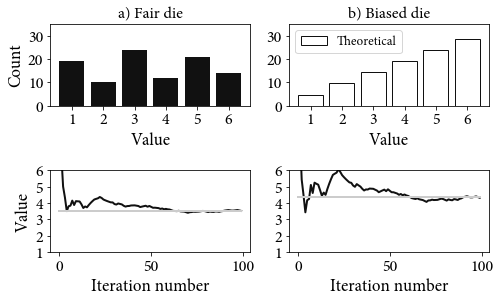

In [196]:
plt.style.use(str(Path(".").parent / 'PaperDoubleFig.mplstyle'))
forground_colours = [
    '#111111',
    '#666666',
    '#CCCCCC',
]

def format_top_axis(ax):
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax.set_ylim(top=35)
    ax.set_xlabel("Value")
    

def format_bottom_axis(ax):
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    ax.set_ylim(bottom=1, top=6)
    ax.set_xlabel("Iteration number")
    # ax.legend()
    

fig, ax = plt.subplots(nrows=2, ncols=2)
h, _ = np.histogram(trials_fair, bins=np.linspace(0.5, 6.5, 7))
ax[0,0].bar(x, h, color=forground_colours[0])
format_top_axis(ax[0,0])
ax[0,0].set_ylabel("Count")
ax[0,0].set_title("a) Fair die")

ax[0,1].bar(x, weights * len(trials_fair), color='w', edgecolor=forground_colours[0], label="Theoretical")
format_top_axis(ax[0,1])
ax[0,1].legend()
ax[0,1].set_title("b) Biased die")

# Plot sample mean of fair die
index = np.arange(len(trials_fair))
fair_mean = np.cumsum(trials_fair) / index
ax[1,0].plot(index, fair_mean, color=forground_colours[0], label="Sample mean")
ax[1,0].plot(index, [fair_expected]*len(index), color=forground_colours[2], label="Population mean")
format_bottom_axis(ax[1,0])
ax[1,0].set_ylabel("Value")

# Plot sample mean of biased die without actually rolling
index = np.arange(len(trials_fair))
resampled = trials_fair * weights[np.subtract(trials_fair, 1)] / (1/6)
biased_mean = np.cumsum(resampled) / index
ax[1,1].plot(index, biased_mean, color=forground_colours[0], label="Sample mean")
ax[1,1].plot(index, [biased_expected]*len(index), color=forground_colours[2], label="Population mean")
format_bottom_axis(ax[1,1])
plt.savefig(
    os.path.join(
        plot_dir,
        "gradient_variance.png"),
    dpi=300)